In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("country_vaccinations.csv")

In [3]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data["Sum_total_vaccinations"]=data.groupby("country").total_vaccinations.tail(1)

In [7]:
data.groupby("country")["Sum_total_vaccinations"].mean().sort_values(ascending=False).head(10)

country
China            3.263129e+09
India            1.834501e+09
United States    5.601818e+08
Brazil           4.135596e+08
Indonesia        3.771089e+08
Japan            2.543456e+08
Bangladesh       2.436427e+08
Pakistan         2.193686e+08
Vietnam          2.031444e+08
Mexico           1.919079e+08
Name: Sum_total_vaccinations, dtype: float64

Top ten countries with the highest number of total vaccinations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


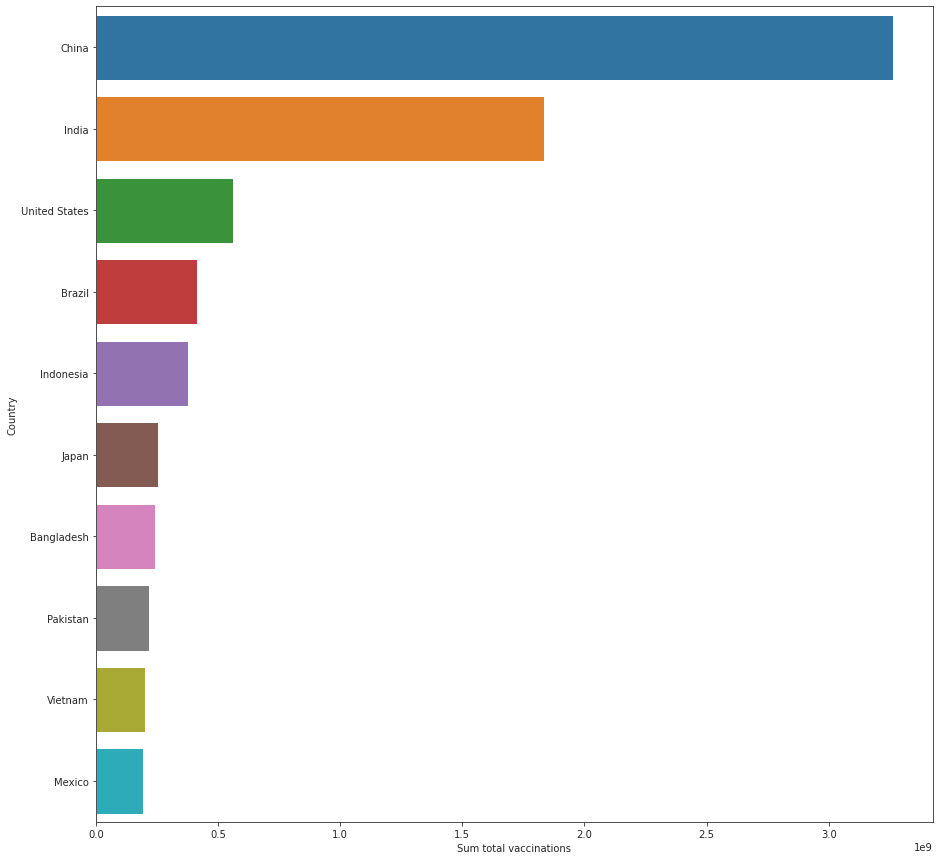

In [8]:
sum_total_vaccinations = data.groupby("country")["Sum_total_vaccinations"].mean().sort_values(ascending= False).head(10)
sns.set_style("ticks")
plt.figure(figsize= (15,15))
ax= sns.barplot(sum_total_vaccinations.values,sum_total_vaccinations.index)
ax.set_xlabel("Sum total vaccinations")
ax.set_ylabel("Country")
plt.show()

In [9]:
data["Sum_full_vaccinations"]=data.groupby("country").people_fully_vaccinated.tail(1)
sum_full_vaccinations=data.groupby("country")["Sum_full_vaccinations"].mean().sort_values(ascending= False).head(10)
sum_full_vaccinations

country
India            828229455.0
United States    217498967.0
Brazil           160272858.0
Indonesia        158830466.0
Bangladesh       107712737.0
Pakistan         101881176.0
Japan            100633737.0
Mexico            79711762.0
Vietnam           77754108.0
Russia            72841232.0
Name: Sum_full_vaccinations, dtype: float64

Top ten countries with the highest number of full vaccinations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


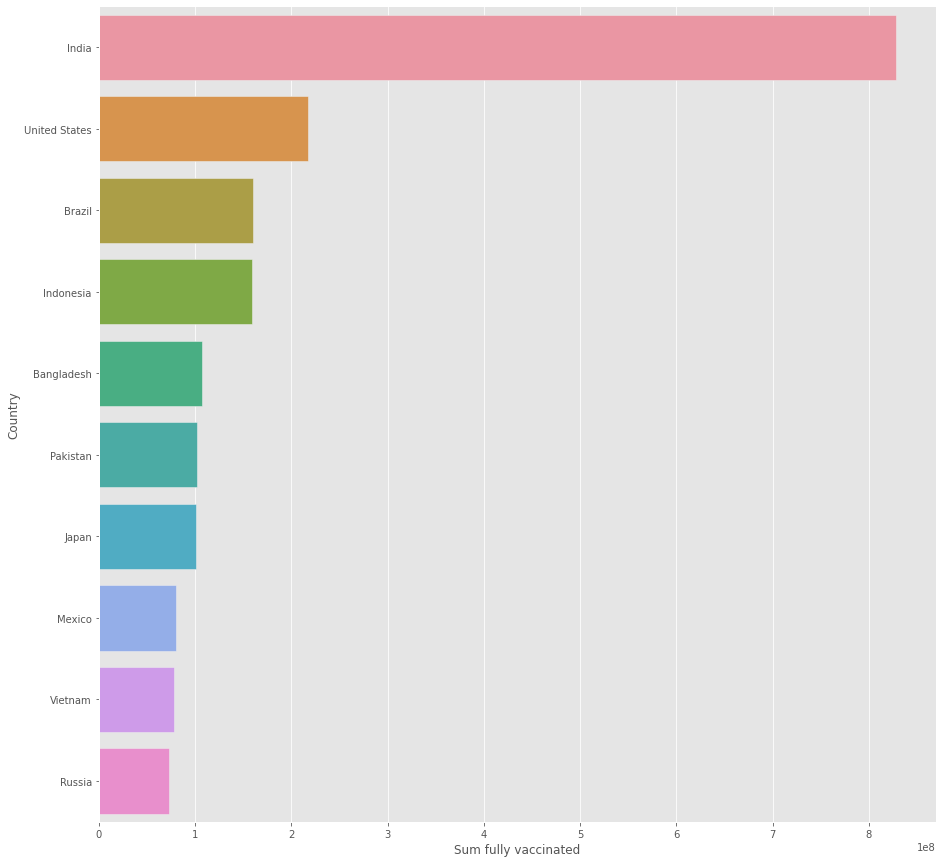

In [10]:
plt.style.use("ggplot")
plt.figure(figsize=(15,15))
ax= sns.barplot(sum_full_vaccinations.values,sum_full_vaccinations.index)
ax.set_xlabel("Sum fully vaccinated")
ax.set_ylabel("Country")
plt.show()

Sum of all vaccine types

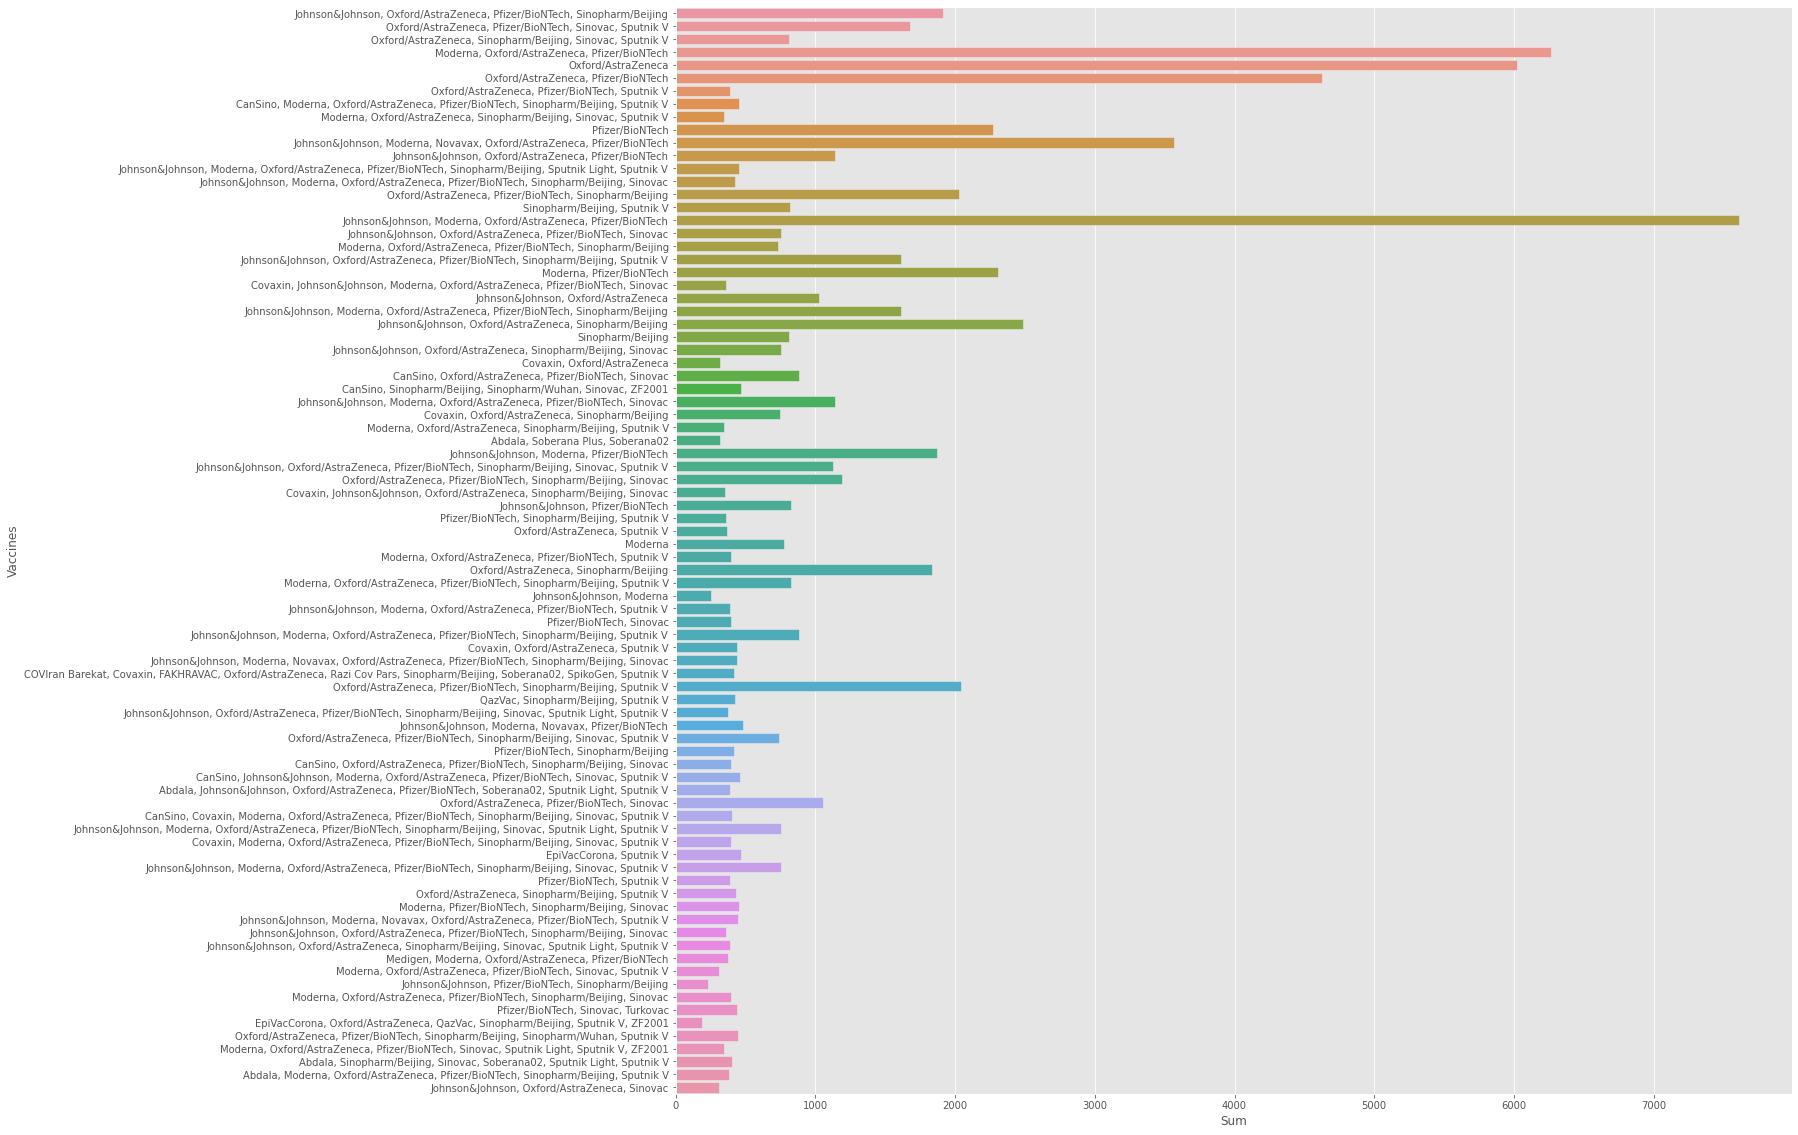

In [11]:
plt.figure(figsize=(20,20))
sns.countplot(y="vaccines",data=data)
plt.ylabel("Vaccines")
plt.xlabel("Sum")
plt.show()

In [12]:
data["date"]= pd.to_datetime(data.date)

The evolution of daily vaccinations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


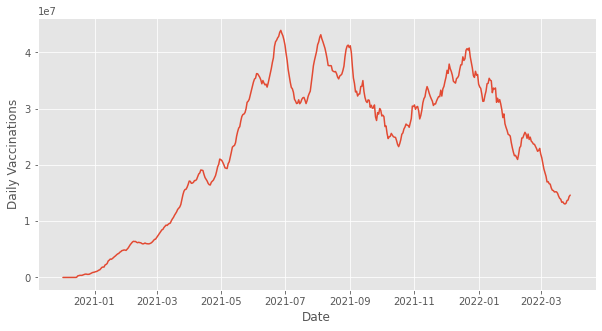

In [13]:
sum_daily_vaccinations=data.groupby("date").daily_vaccinations.sum()
plt.style.use("ggplot")
plt.figure(figsize= (10,5))
sns.lineplot(sum_daily_vaccinations.index,sum_daily_vaccinations.values)
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.show()

In [14]:
print(data['source_name'].value_counts())

World Health Organization                            26822
Ministry of Health                                   15027
SPC Public Health Division                            4300
Pan American Health Organization                      3075
Africa Centres for Disease Control and Prevention     2780
                                                     ...  
Government of Aruba                                    366
National Council                                       357
Government of Zambia                                   350
Government of Saint Helena                              92
Government of the Falkland Islands                      67
Name: source_name, Length: 81, dtype: int64


In [16]:
def create_bars(dataFr,x,y,title,figsize=(15,15),rotation=80,size=9,height=None,width=None,colour=None):
    counter=pd.DataFrame({x:dataFr[x],y:dataFr[y]}).sort_values(ascending=False,by=y)
    if not colour==None:
        a=counter[colour]
    else:
        a=None
    plot = px.bar(counter,x=x,y=y,title=title,width=width,height=height,color=a)
    plot.show()

In [17]:
def get_column_values(c, v):
    k=0
    for i in data[c]:
        country = data['country'][k]
        for j in i.split(', '):
            if j in v:
                v[j].append(country)
        k += 1
    return v

In [21]:
import plotly.express as px

In [22]:
from collections import Counter
totalData = []
columnsData = []
def interactive_bar_plot(name, values,col=False):
    columnData = get_column_values(name, values)
    columnsData.append(list(columnData.keys()))
    temp=[]
    for i in list(columnData.keys()):
        column = 'Number of days when '+ i + 'was used'
        counter = Counter(columnData[i])
        dataFr = pd.DataFrame({'countries':counter.keys(), column:counter.values()})
        temp.append(dataFr)
        if col:
            x = column
        else:
            x = None
        create_bars(dataFr, 'countries', column, 'Countries that use '+i+' as source', colour=x)
    totalData.append(temp)

In [35]:
# def bar_col(name, values, colour=False):
#     col_data = get_column_values(name, values)
#     cols_data.append(list(col_data.keys()))
#     temp = []
#     for point in list(col_data.keys()):
#         column = 'days using '+point
#         count = Counter(col_data[point])
#         data = pd.DataFrame({'countries':count.keys(), column:count.values()})
#         temp.append(data)
#         if colour:
#             c = column
#         else:
#             c = None
#         bars(data, 'countries', column, 'Countries who use '+point, colour=c)
#     total_data.append(temp)

In [23]:
interactive_bar_plot('source_name', {'World Health Organization':[], 'Ministry of Health':[], 'SPC Public Health Division':[], 'Pan American Health Organization':[], 'Africa Centres for Disease Control and Prevention':[]},
       col=True)

In [24]:
vaccinesPerCountry = data.groupby(["country", "iso_code", "vaccines"])['total_vaccinations','people_vaccinated'].max().reset_index()
vaccinesPerCountry.columns = ["country", "iso_code", "vaccines", "total vaccinations","people vaccinated"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



People vaccinated per each country depending on vaccines

In [25]:
plot1 = px.treemap(vaccinesPerCountry, values = 'people vaccinated', path = ['vaccines', 'country'], title="People vaccinated per each country depending on vaccines")
plot1.show()

Total vaccinations per each country depending on vaccines

In [26]:
plot2 = px.treemap(vaccinesPerCountry, values = 'total vaccinations', path = ['vaccines', 'country'], title="Total vaccinations per each country depending on vaccines")
plot2.show()